# New York Stock Exchange



***
## Content
- Introduction
- Data description
- Formulation of research questions
- Data preparation
- Data mining/collection



***
### Introduction
#### What Is the New York Stock Exchange (NYSE)?

The New York Stock Exchange (NYSE) is a stock exchange located in New York City that is the largest equities-based exchange in the world, based on the total market capitalization of its listed securities. Formerly run as a private organization, the NYSE became a public entity in 2005 following the acquisition of electronic trading exchange Archipelago. In 2007, a merger with Euronext, the largest stock exchange in Europe, led to the creation of NYSE Euronext, which was later acquired by Intercontinental Exchange, the current parent of the New York Stock Exchange.
#### How the New York Stock Exchange Works
Located on Wall Street in New York City, the NYSE—also known as the "Big Board"—is made up of 21 rooms that are used to facilitate trading. The main building, located at 18 Broad Street, and the one at 11 Wall Street, were both designated historical landmarks in 1978. The NYSE is the world’s largest stock exchange by market capitalization, estimated to be $28.5 trillion as of June 30, 2018.


The NYSE relied for many years on floor trading only, using the open outcry system. Many NYSE trades have transitioned to electronic systems, but floor traders are still used to set pricing and deal in high-volume institutional trading. 

Currently, the NYSE is open for trading Monday through Friday from 9:30 a.m. to 4:00 p.m. ET. The stock exchange is closed on all federal holidays. When federal holidays fall on a Saturday, the NYSE is sometimes closed the preceding Friday. When the federal holiday falls on a Sunday, the NYSE may be closed the following Monday.

**References**
1. https://www.investopedia.com/terms/n/nyse.asp - Article about NYSE on Investodepia website.

*Other references are shown at the end of this article*

***
### Data description
This project work is about the New York Stock Exchange. I got my dataset from Kaggle.com. This dataset consists of 4 files. 
But I will use 2 of them, they are descriptions of each company and companies' reports on Form-10-K that were taken by the US Securities and Exchange Commission in 2012-2016In this dataset, we have dozens of columns like 
- cost of revenue - is the total cost of manufacturing and delivering a product or service to consumers;
- cash ratio - is a measurement of a company's liquidity, specifically the ratio of a company's total cash and cash equivalents to its current liabilities;
- gross margin - is a company's net sales revenue minus its cost of goods sold;
- income tax - is a type of tax that governments impose on income generated by businesses and individuals;
- investments - is an asset or item that is purchased with the hope that it will generate income or appreciate in value at some point in the future;
- liabilities - is something a person or company owes, usually a sum of money.;
- net cash flow -  is a figure that is reported on a company's financial statements;
- earnings per share -  is calculated as a company's profit divided by the outstanding shares of its common stock;
- volume - is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded and, for futures and options, it is based on how many contracts have changed hands;
- and other lots of interesting indicators.

#### Questions that I will consider in this project:
- Analysing companies based on their economical indicators.
- Analyse distribution of cash ratio between all companies. 
- Analysing correlation between volume and price of the stock.
- Determine and analyse on the relation between Cost of Revenue and Income tax.
- Analyse the relationship between the price change and volume, cost of the stock.

**Source for the definitions:** investopedia.com

***
### Web scraping

In [1]:
import requests 
import seaborn as sns
import pandas as pd
import os

In [2]:
url = 'https://www.investing.com/indices/nyse-us-100-components'

header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

scr = requests.get(url, headers=header)

temp = pd.read_html(scr.text)
scrapped = temp[0]
scrapped

,Unnamed: 0,Name,Last,High,Low,Chg.,Chg. %,Vol.,Time,Unnamed: 9
0,NaN,3M,169.79,170.26,167.28,2.74,+1.64%,1.81M,13/11,NaN
1,NaN,Abbott Labs,112.60,113.09,111.42,0.65,+0.58%,3.92M,13/11,NaN
2,NaN,Accenture,241.78,242.42,238.09,3.63,+1.52%,1.46M,13/11,NaN
3,NaN,AIG,37.32,37.41,36.29,1.26,+3.49%,5.08M,13/11,NaN
4,NaN,Altria,40.33,40.40,39.40,0.83,+2.10%,6.55M,13/11,NaN
...,...,...,...,...,...,...,...,...,...,...
78,NaN,Walgreens Boots,42.71,42.74,40.94,1.94,+4.76%,6.45M,13/11,NaN
79,NaN,Walmart,150.54,150.94,147.52,2.31,+1.56%,6.60M,13/11,NaN
80,NaN,Walt Disney,138.36,141.19,136.52,2.84,+2.10%,21.07M,13/11,NaN
81,NaN,Wells Fargo&Co,24.07,24.18,23.73,0.26,+1.09%,30.10M,13/11,NaN


*** 
### Data Cleaning

In [3]:
scrapped.isnull().sum()

Unnamed: 0    83
Name           0
Last           0
High           0
Low            0
Chg.           0
Chg. %         0
Vol.           0
Time           0
Unnamed: 9    83
dtype: int64

In [4]:
scrapped.drop(['Unnamed: 0', 'Unnamed: 9'], axis=1, inplace=True)

In [5]:
#converting M, B to millions, billions as float
scrapped.rename(columns = {'Vol.':'Vol'}, inplace=True)
scrapped.Vol = (scrapped.Vol.replace(r'[KM]+$', '', regex=True).astype(float) * \
              scrapped.Vol.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

In [6]:
col = scrapped.loc[: , "High":"Low"]
scrapped['Avg'] = col.mean(axis=1)

In [7]:
#here is how scrapped dataframe looks now
scrapped

,Name,Last,High,Low,Chg.,Chg. %,Vol,Time,Avg
0,3M,169.79,170.26,167.28,2.74,+1.64%,1810000.0,13/11,168.770
1,Abbott Labs,112.60,113.09,111.42,0.65,+0.58%,3920000.0,13/11,112.255
2,Accenture,241.78,242.42,238.09,3.63,+1.52%,1460000.0,13/11,240.255
3,AIG,37.32,37.41,36.29,1.26,+3.49%,5080000.0,13/11,36.850
4,Altria,40.33,40.40,39.40,0.83,+2.10%,6550000.0,13/11,39.900
...,...,...,...,...,...,...,...,...,...
78,Walgreens Boots,42.71,42.74,40.94,1.94,+4.76%,6450000.0,13/11,41.840
79,Walmart,150.54,150.94,147.52,2.31,+1.56%,6600000.0,13/11,149.230
80,Walt Disney,138.36,141.19,136.52,2.84,+2.10%,21070000.0,13/11,138.855
81,Wells Fargo&Co,24.07,24.18,23.73,0.26,+1.09%,30100000.0,13/11,23.955


In [8]:
#reading fundamentals.csv
df=pd.read_csv("fundamentals.csv")

In [9]:
#our dataframe before the data cleaning
df

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [10]:
#showing the sum of null values per column
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [11]:
#getting rid of null values in df using interpolate() function
df=df.interpolate()

In [12]:
#final result
df

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,54.4,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [13]:
#showing the sum of null values per column after the cleaning
df.isnull().sum()

Unnamed: 0                      0
Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 79, dtype: int64

In [14]:
#reading securities.csv file
df2=pd.read_csv("securities.csv")

In [15]:
#showing the sum of null values per column
df2.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [16]:
#it was not impossible to fill 'Date first added' column by the interpolate() function so I just used fillna() 
#with "bfill" method.
df2=df2.fillna(method="bfill")

In [17]:
df2

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1964-03-31,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",1997-10-06,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2013-06-21,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2013-06-21,109380


In [18]:
#showing the sum of null values per column after the cleaning
df2.isnull().sum()

Ticker symbol              0
Security                   0
SEC filings                0
GICS Sector                0
GICS Sub Industry          0
Address of Headquarters    0
Date first added           0
CIK                        0
dtype: int64

In [19]:
#in scrapped data frame there is no duplicates
scrapped.duplicated().sum()

0

In [20]:
#checking for the duplicated rows for the df 
df.duplicated().sum()

0

In [21]:
#checking for the duplicated rows by combination of two columns
df.duplicated(['Ticker Symbol', 'For Year']).sum()

62

In [22]:
#dropping these duplicates
df.drop_duplicates(['Ticker Symbol', 'For Year'], inplace=True)

In [23]:
df

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,1775,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,65.8,...,0.000000e+00,0.000000e+00,7.369530e+09,4.983934e+10,5.720887e+10,2.361631e+09,0.0,2014.0,1.68,2.371798e+08
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,54.4,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08


In [24]:
#checking the duplicated rows in df2
df2.duplicated().sum()

0

In [25]:
#checking for the duplicates by the combination of two columns
df2.duplicated(['Ticker symbol', 'Security']).sum()

0

***
### Groupby, boolean filters and join

In [26]:
#there are examples of renaming columns for their futher use
df.rename(columns = {'Ticker Symbol':'Ticker_Symbol'}, inplace=True)

In [27]:
df2.rename(columns = {'Ticker Symbol':'Ticker_Symbol'}, inplace=True)

In [28]:
df.rename(columns = {'Total Revenue':'Total_Revenue'}, inplace=True)

In [29]:
df2.rename(columns = {'Ticker symbol':'Ticker_Symbol'}, inplace=True)

In [30]:
df.columns

Index(['Unnamed: 0', 'Ticker_Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [31]:
#example for the use of groupby() function
df.groupby('For Year').Total_Revenue.mean()

For Year
1215.000000    7.613800e+09
2012.000000    1.866838e+10
2012.500000    3.632166e+09
2012.600000    2.892714e+09
2013.000000    2.031865e+10
2013.200000    2.355892e+09
2013.333333    6.497000e+09
2013.500000    2.430935e+10
2013.600000    1.159971e+09
2013.666667    6.394000e+09
2013.800000    1.897909e+09
2014.000000    2.050510e+10
2014.166667    8.891000e+09
2014.200000    1.225381e+09
2014.333333    6.320000e+09
2014.400000    1.561249e+09
2014.500000    1.971446e+10
2014.666667    7.978912e+09
2014.800000    1.237507e+09
2014.833333    8.891000e+09
2015.000000    2.013930e+10
2015.333333    1.087986e+10
2015.400000    1.219262e+09
2015.500000    5.521666e+09
2016.000000    2.762864e+10
Name: Total_Revenue, dtype: float64

In [32]:
df[df.Total_Revenue > 2.361631e+09]

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1772,ZBH,2015-12-31,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1773,1773,ZION,2012-12-31,0.000000e+00,0.0,0.000000e+00,6.0,-6.889400e+07,0.000000e+00,88.6,...,0.000000e+00,0.000000e+00,6.052069e+09,4.945985e+10,5.551192e+10,2.458592e+09,0.000000e+00,2012.0,0.97,3.603258e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [33]:
#example for the use of boolean filters as AND
df[(df.Total_Revenue > 2.361631e+09) & (df.Ticker_Symbol == 'AAL')]

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08


In [34]:
#example for the use of boolean filters as OR
df[(df.Total_Revenue > 2.361631e+09) | (df.Ticker_Symbol == 'AAL')]

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1772,ZBH,2015-12-31,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1773,1773,ZION,2012-12-31,0.000000e+00,0.0,0.000000e+00,6.0,-6.889400e+07,0.000000e+00,88.6,...,0.000000e+00,0.000000e+00,6.052069e+09,4.945985e+10,5.551192e+10,2.458592e+09,0.000000e+00,2012.0,0.97,3.603258e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [35]:
(df.Total_Revenue > 2.361631e+09) & (df.Ticker_Symbol == 'AAL')

0        True
1        True
2        True
3        True
4       False
        ...  
1775    False
1776    False
1777    False
1778    False
1779    False
Length: 1719, dtype: bool

### Merging two dataframes

In [36]:
df3=pd.merge(df, df2, on="Ticker_Symbol")

In [37]:
df3

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,2012.0,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,2013.0,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,2014.0,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,2015.0,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,2012.0,5.29,7.328355e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1775,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,65.8,...,2014.0,1.68,2.371798e+08,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2013-06-21,109380
1715,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,54.4,...,2015.0,1.20,2.578925e+08,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2013-06-21,109380
1716,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,2013.0,1.01,4.990099e+08,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280
1717,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,2014.0,1.16,5.025862e+08,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280


In [38]:
#dropping the column Unnamed: 0 which is unnecessery
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
df3

,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,2012.0,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,2013.0,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,2014.0,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,2015.0,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,2012.0,5.29,7.328355e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,65.8,1.396843e+10,...,2014.0,1.68,2.371798e+08,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2013-06-21,109380
1715,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,54.4,1.576313e+10,...,2015.0,1.20,2.578925e+08,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2013-06-21,109380
1716,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,2013.0,1.01,4.990099e+08,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280
1717,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,2014.0,1.16,5.025862e+08,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280


***
### Visualisation

#### Analysing companies based on their economical indicators.

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
#renaming columns for the further use
df.rename(columns = {'For Year':'For_Year'}, inplace=True)
df.rename(columns = {'Total Equity':'Total_Equity'}, inplace=True)

In [42]:
#isolating dataframes for following companies 
apple = df[df.Ticker_Symbol == 'AAPL']

In [43]:
apple

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total_Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For_Year,Earnings Per Share,Estimated Shares Outstanding
8,8,AAPL,2013-09-28,3.622300e+10,-1.949000e+09,1.156000e+09,30.0,-8.165000e+09,0.0,93.0,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
9,9,AAPL,2014-09-27,4.864900e+10,-6.452000e+09,9.800000e+08,35.0,-9.571000e+09,0.0,40.0,...,6.853100e+10,6.344800e+10,1.115470e+11,1.202920e+11,2.318390e+11,1.827950e+11,0.0,2014.0,6.49,6.087827e+09
10,10,AAPL,2015-09-26,6.067100e+10,-3.124000e+09,1.285000e+09,45.0,-1.124700e+10,0.0,52.0,...,8.937800e+10,8.061000e+10,1.193550e+11,1.709900e+11,2.903450e+11,2.337150e+11,0.0,2015.0,9.28,5.753664e+09
11,11,AAPL,2016-09-24,5.932100e+10,1.044000e+09,1.348000e+09,36.0,-1.273400e+10,0.0,85.0,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,2016.0,8.35,5.471497e+09


In [44]:
walmart = df[df.Ticker_Symbol == 'WMT']

In [45]:
walmart

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total_Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For_Year,Earnings Per Share,Estimated Shares Outstanding
1706,1706,WMT,2013-01-31,5.909900e+10,-614000000.0,186000000.0,22.0,-1.289800e+10,3.620000e+09,11.0,...,5.994000e+10,7.181800e+10,7.634300e+10,1.267620e+11,2.031050e+11,4.686510e+11,0.0,2013.0,5.04,3.372817e+09
1707,1707,WMT,2014-01-31,5.717400e+10,-566000000.0,119000000.0,21.0,-1.311500e+10,2.362000e+09,10.0,...,6.118500e+10,6.934500e+10,7.625500e+10,1.284960e+11,2.047510e+11,4.762940e+11,0.0,2014.0,4.90,3.269796e+09
1708,1708,WMT,2015-01-31,5.858300e+10,-569000000.0,113000000.0,20.0,-1.217400e+10,2.462000e+09,14.0,...,6.327800e+10,6.525300e+10,8.139400e+10,1.220960e+11,2.034900e+11,4.856510e+11,0.0,2015.0,5.07,3.227416e+09
1709,1709,WMT,2016-01-31,5.861500e+10,-19000000.0,81000000.0,18.0,-1.147700e+10,1.805000e+09,13.0,...,6.023900e+10,6.461900e+10,8.054600e+10,1.190350e+11,1.995810e+11,4.821300e+11,0.0,2016.0,4.58,3.208297e+09


In [46]:
visa = df[df.Ticker_Symbol == 'V']

In [47]:
visa

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total_Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For_Year,Earnings Per Share,Estimated Shares Outstanding
1622,1622,V,2013-09-30,2.186000e+09,-383000000.0,0.0,19.0,-471000000.0,1.887500e+10,99.0,...,7.822000e+09,4.335000e+09,2.687000e+10,9.086000e+09,3.595600e+10,1.177800e+10,0.0,2013.0,7.16,6.178105e+08
1623,1623,V,2014-09-30,2.182000e+09,-40000000.0,35000000.0,20.0,-553000000.0,1.829900e+10,91.0,...,9.562000e+09,6.006000e+09,2.741300e+10,1.115600e+10,3.856900e+10,1.270200e+10,0.0,2014.0,6.38,4.904771e+08
1624,1624,V,2015-09-30,2.502000e+09,359000000.0,-66000000.0,21.0,-414000000.0,1.807300e+10,132.0,...,1.002100e+10,5.355000e+09,2.984200e+10,9.525000e+09,3.936700e+10,1.388000e+10,0.0,2015.0,5.60,3.631438e+08
1625,1625,V,2016-09-30,3.005000e+09,326000000.0,556000000.0,18.0,-523000000.0,1.739500e+10,124.0,...,1.431300e+10,8.046000e+09,3.291200e+10,3.112300e+10,6.403500e+10,1.508200e+10,-170000000.0,2016.0,4.82,2.358105e+08


In [48]:
microsoft = df[df.Ticker_Symbol == 'MSFT']

In [49]:
microsoft

,Unnamed: 0,Ticker_Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total_Equity,Total Liabilities,Total Liabilities & Equity,Total_Revenue,Treasury Stock,For_Year,Earnings Per Share,Estimated Shares Outstanding
1107,1107,MSFT,2013-06-30,1.018200e+10,-1.807000e+09,288000000.0,28.0,-4.257000e+09,0.0,206.0,...,1.014660e+11,3.741700e+10,7.894400e+10,6.348700e+10,1.424310e+11,7.784900e+10,0.0,2013.0,2.61,8.376628e+09
1108,1108,MSFT,2014-06-30,1.356900e+10,-1.120000e+09,61000000.0,25.0,-5.485000e+09,0.0,188.0,...,1.142460e+11,4.562500e+10,8.978400e+10,8.260000e+10,1.723840e+11,8.683300e+10,0.0,2014.0,2.66,8.298496e+09
1109,1109,MSFT,2015-06-30,1.238500e+10,1.456000e+09,346000000.0,15.0,-5.944000e+09,0.0,194.0,...,1.227970e+11,4.964700e+10,8.008300e+10,9.438900e+10,1.744720e+11,9.358000e+10,0.0,2015.0,1.49,8.183221e+09
1110,1110,MSFT,2016-06-30,1.303600e+10,-5.300000e+08,-431000000.0,23.0,-8.343000e+09,0.0,191.0,...,1.396600e+11,5.935700e+10,7.199700e+10,1.216970e+11,1.936940e+11,8.532000e+10,0.0,2016.0,2.12,7.923585e+09


In [50]:
apple.Total_Revenue / apple.Total_Revenue.iloc[0] * 100

8     100.000000
9     106.953952
10    136.747411
11    126.171084
Name: Total_Revenue, dtype: float64

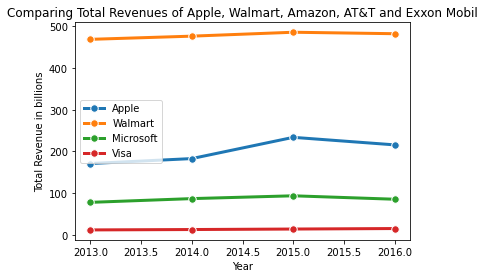

In [51]:
plt.plot(apple.For_Year, apple.Total_Revenue/10**9, linewidth=3, marker='.', markersize=15, markeredgecolor='white')
plt.plot(walmart.For_Year, walmart.Total_Revenue/10**9, linewidth=3, marker='.', markersize=15,  markeredgecolor='white')
plt.plot(microsoft.For_Year, microsoft.Total_Revenue/10**9, linewidth=3, marker='.', markersize=15,  markeredgecolor='white')
plt.plot(visa.For_Year, visa.Total_Revenue/10**9, linewidth=3, marker='.', markersize=15,  markeredgecolor='white')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.title('Comparing Total Revenues of Apple, Walmart, Amazon, AT&T and Exxon Mobil')
plt.legend(['Apple', 'Walmart', 'Microsoft', 'Visa'])
plt.xlabel('Year')
plt.ylabel('Total Revenue in billions')
plt.show()

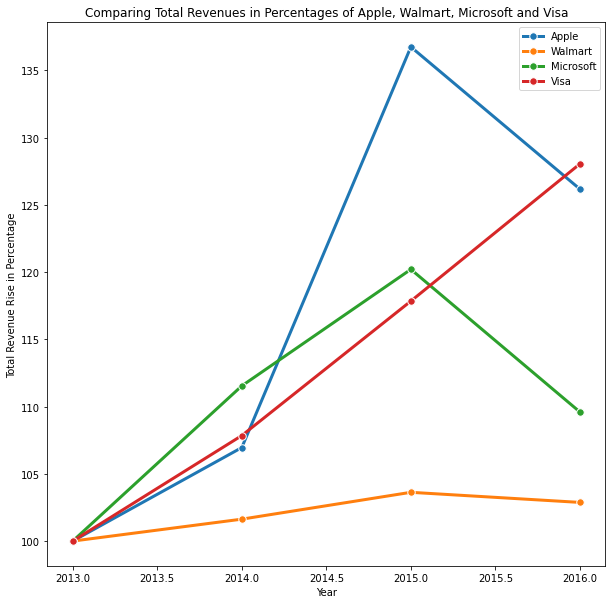

In [52]:
plt.plot(apple.For_Year, apple.Total_Revenue / apple.Total_Revenue.iloc[0] * 100,  linewidth=3, marker='.', markersize=15, markeredgecolor='white')
plt.plot(walmart.For_Year, walmart.Total_Revenue / walmart.Total_Revenue.iloc[0] * 100,  linewidth=3, marker='.', markersize=15, markeredgecolor='white')
plt.plot(microsoft.For_Year, microsoft.Total_Revenue / microsoft.Total_Revenue.iloc[0] * 100,  linewidth=3, marker='.', markersize=15, markeredgecolor='white')
plt.plot(visa.For_Year, visa.Total_Revenue / visa.Total_Revenue.iloc[0] * 100,  linewidth=3, marker='.', markersize=15, markeredgecolor='white')
rcParams['figure.figsize'] = 10, 10

plt.title('Comparing Total Revenues in Percentages of Apple, Walmart, Microsoft and Visa')
plt.legend(['Apple', 'Walmart', 'Microsoft', 'Visa'])
plt.xlabel('Year')
plt.ylabel('Total Revenue Rise in Percentage')
plt.show()

***
### Description on this

The first graph above illustrates the total fluctuations of 5 big companies as Apple, Microsoft, Walmart and Visa. By looking on lines we can say that 
Walmart, Microsoft and Visa are keeping one level stable. Apple has a slight improvement starting from 2014 till 2015. 
Out of these 4 companies, Walmart has the biggest total revenue along all years. They have about 170 billions USD of total revenue per year. The second biggest on this is Apple with about 230 billions, the two underdogs are Microsoft with about 90 billion and Visa with about 10 billion.

The second graph shows total revenue rise in percentages. We can see how Apple's revenue drastically rose between 2014 till 2015 up to 37% comparing to 2014 results.  However next year their rise pace dropped to 26%.  Visa really surprised me on this they have been increasing their total revenue pace each year, in 4 years they increased their total revenue up to 28& and there were not any significant drops.  Microsoft was increasing their total revenue rise rate up to 20% starting from 2013 till 2015, but then the rising rate dropped to 9%.  Walmart has the slowest rise rate between its competitors on this graph, in 4 years they rise just for 3%.

***
### Analyse distribution of cash ratio between all companies

In [53]:
df.rename(columns = {'Cash Ratio':'Cash_Ratio'}, inplace=True)

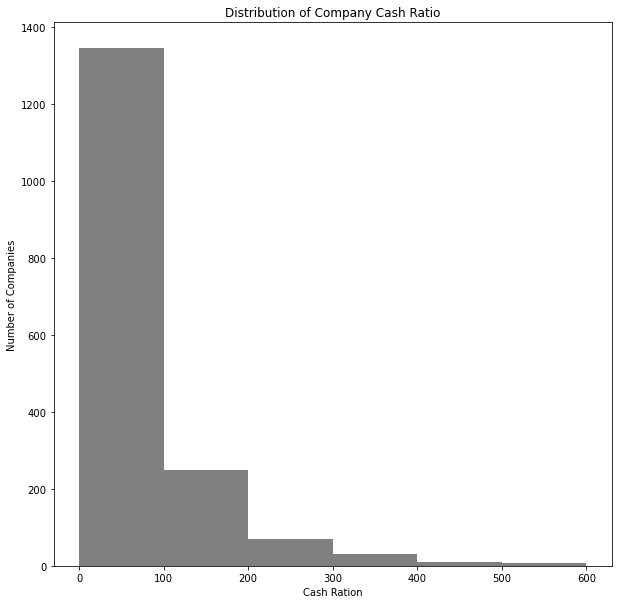

In [54]:
bins = [0, 100, 200, 300, 400, 500, 600]
plt.hist(df.Cash_Ratio, bins=bins, color="grey")
plt.xticks(bins)
plt.xlabel("Cash Ration")
plt.ylabel("Number of Companies")
plt.title("Distribution of Company Cash Ratio")
plt.show()

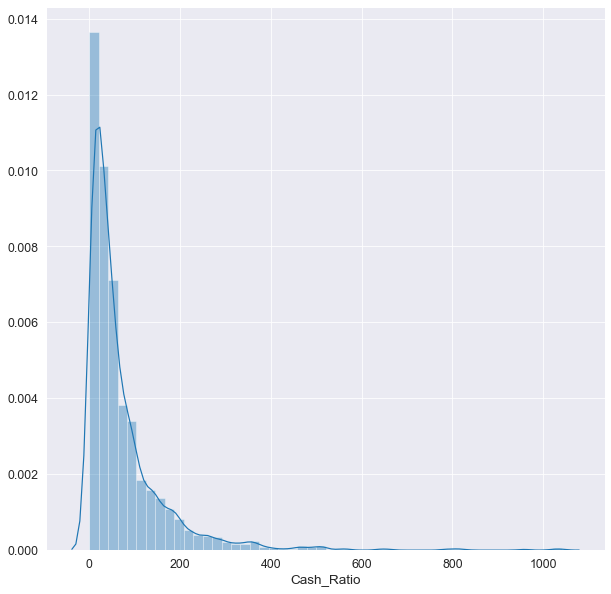

In [55]:
#the same histogram with seaborn library
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)
sns.distplot(df['Cash_Ratio'])

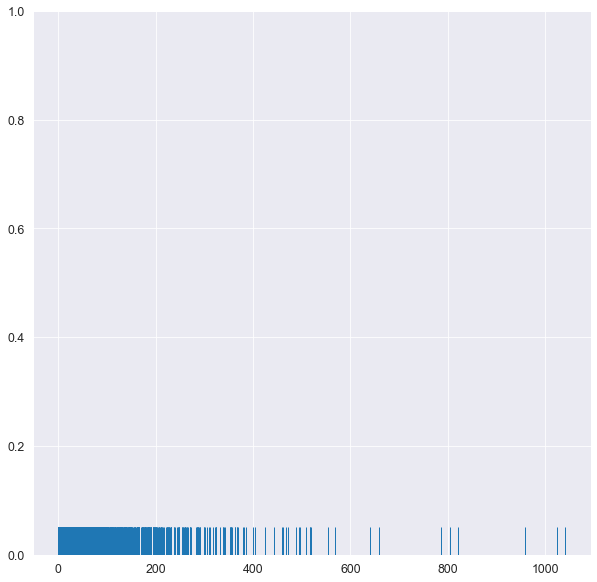

In [56]:
#the same distibution with rugplot
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)
sns.rugplot(df['Cash_Ratio'])

***
#### Description on this

On plotted histogram above we could see the distribution of cash ratio between companies. As you can see, most of the companies' cash ratio is between 0 and 100. The number of companies at this level is about 1350.  The next major ratio is between 100 and 200, in this region about 220 companies lye. The third level is between 200 and 300 and in this region about 50 companies lye. Other levels are decreasing respectively. 

The same conclusion can be conducted on a plotted rugplot and distplot.

***
### Analysing correlation between volume and price of the stock

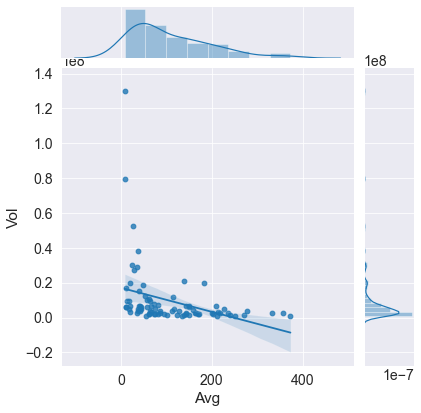

In [57]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.6)
sns.jointplot(x='Avg', y='Vol', data=scrapped, kind='reg')

***
#### Description on this

On this plotted jointplot we can see the correlation volume and its price based on 13th November 2020. By analysing the plot we could realise that the volume of stocks was decreasing as its price rise. This was also represented by the best fit line. It has a negative slope. So this plot justifies that the amount of trades decreases as its price rise. 

#### Determine and analyse on the relation between Cost of Revenue and Income tax

In [58]:
df.rename(columns = {'Income Tax':'Income_Tax'}, inplace=True)

In [59]:
df.rename(columns = {'Cost of Revenue':'Cost_of_Revenue'}, inplace=True)

In [60]:
#converting exponentials to the integer
df['Income_Tax'] = df['Income_Tax'].astype('int64')

In [61]:
df['Cost_of_Revenue'] = df['Cost_of_Revenue'].astype('int64')

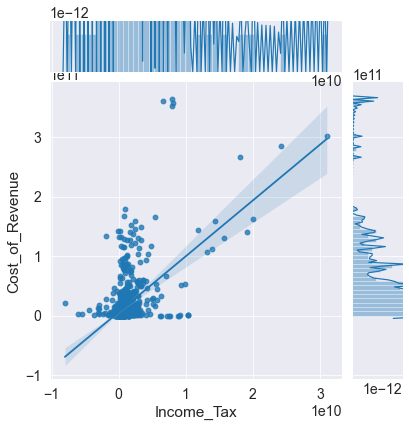

In [62]:
sns.set_style('darkgrid')
sns.jointplot(x='Income_Tax', y='Cost_of_Revenue', data=df, kind='reg')

***
#### Description on this

On this jointplot, we can see the correlation between income tax and cost of revenue. Our best fit line represents that income tax rises as the cost of revenue rises. That means the slope is positive and these columns are directly proportional to each other.

#### Analyse the relationship between the price change and volume, cost of the stock

In [63]:
scrapped.rename(columns = {'Chg. %':'ChangeInPrc'}, inplace=True)

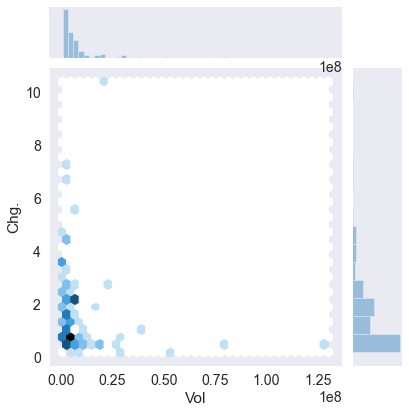

In [64]:
sns.set_style('dark')
sns.set_context('paper', font_scale=1.6)
sns.jointplot(x='Vol', y='Chg.', data=scrapped, kind='hex')

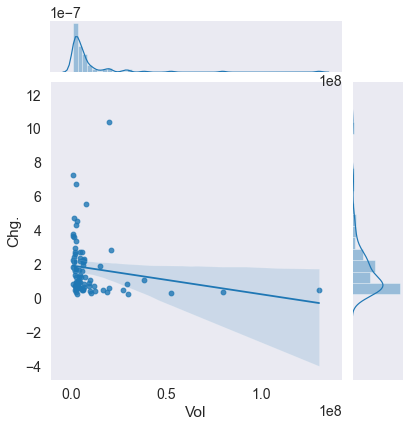

In [65]:
sns.set_style('dark')
sns.set_context('paper', font_scale=1.6)
sns.jointplot(x='Vol', y='Chg.', data=scrapped, kind='reg')

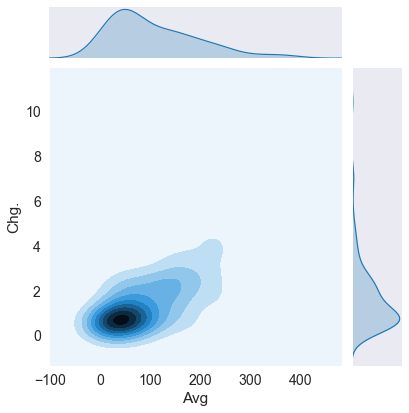

In [66]:
sns.set_style('dark')
sns.set_context('paper', font_scale=1.6)
sns.jointplot(x='Avg', y='Chg.', data=scrapped, kind='kde')

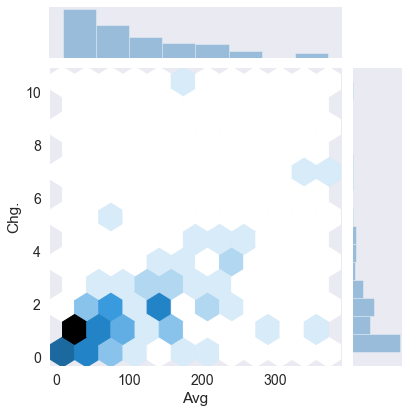

In [67]:
sns.set_style('dark')
sns.set_context('paper', font_scale=1.6)
sns.jointplot(x='Avg', y='Chg.', data=scrapped, kind='hex')

***
#### Description on this

On the first jointplot we see that the most part of the change in price are between 0 and 4 and the slope is little negative but not clearly, it can be also stated as neutral. To investigate properly we need more data. But what about average price and change in price, there we clearly see direct proportionality, because as price rises the change in price also rises. 

### Conclusion

By working on this topic NYSE following conclusions were stated. 

First of all, we can see based on my 5 questions there is always a quiet relationship between certain columns. We can see either direct or indirect relationship which says that in economics financial indicators are dependent on each other.

Secondly, there is also the exception as in my last question.  When I plotted jointplot of stock volume and change in price, in this case the slope was likely to be neutral. Which may contradict to my first conclusion, but we have to accept it. Exceptions are rare but they exist, so that's ok.

Thirdly, the results of these investigations are not against my expectations. For instance, people are buying most when the stock price is cheap and the number of trades decreases as price increases which logically. Moreover, the government will force more taxes on companies who have a big income rate. Which we can see on our graphs. 

Finally, one graph can be not enough to make the right conclusion. For example, on my first and last questions, I had more than one graphs, because the graph that I had in the first time was not enough good to say something about it. On the first question, in the beginning, we may say that Vise is so bad between those 4 companies, but in the second graph, we see that its revenue rise in percentage is more than everyone.

